# Case Study 2 - Measures of Central Tendency and Dispersion

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data=pd.read_csv(r"C:\Users\Anila John\Downloads\StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 1. Find out how many males and females participated in the test.


In [33]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

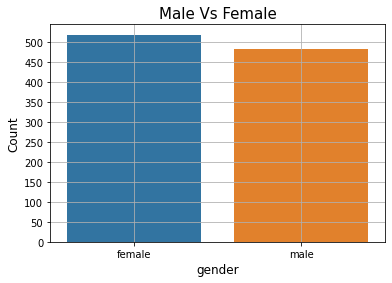

In [34]:
sns.countplot(x=data['gender'], data=data)
plt.title("Male Vs Female",fontsize=15)
plt.xlabel("gender",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.yticks(np.arange(0,550,50))
plt.grid()

### 2. What do you think about the students' parental level of education?

In [35]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

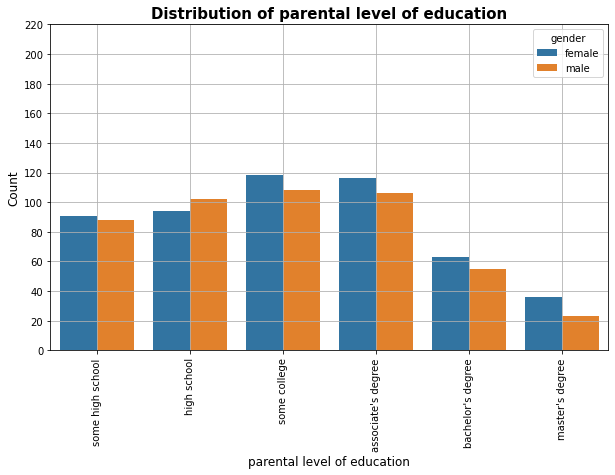

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['parental level of education'], data=data,hue='gender')
plt.title("Distribution of parental level of education",fontsize=15,fontweight='bold')
plt.xlabel("parental level of education",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,240,20))
plt.grid()

Text(0.5, 1.0, 'Parental level of education ')

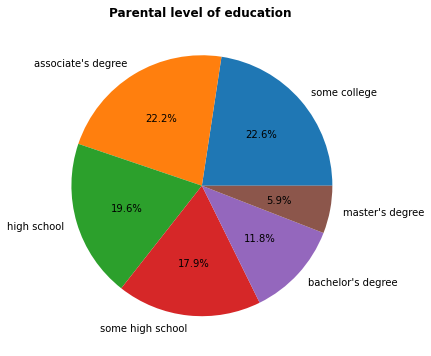

In [37]:
plt.figure(figsize=(8,6))
df= data["parental level of education"].value_counts()
plt.pie(df,labels=df.index,autopct='%1.1f%%')
plt.title("Parental level of education ",fontweight="bold")

### 3 a). Who scores the most on average for math, reading and writing based on gender.

In [38]:
data.groupby(['gender'])[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


Genderwise, males score more on maths & Females score more on reading and writing based on average.

### 3 b). Who scores the most on average for math, reading and writing based on Test preparation course.

In [39]:
data.groupby(['test preparation course'])[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Here, completed students got high scores based on test preparation course.

### 4 a). What do you think about the scoring variation for math, reading and writing based on gender.


In [40]:
data.groupby("gender")[["math score","reading score","writing score"]].std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


Here, Standard Deviation is more for Female than male based on gender.

### 4 b). What do you think about the scoring variation for math, reading and writing based on Test preparation course.

In [41]:
data.groupby("test preparation course")[["math score","reading score","writing score"]].std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


Here, Standard Deviation is more for none than completed based on test preparation course.

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


In [42]:
np.quantile(data['math score'],.75)

77.0

Students who scores greater than 77 in maths will get the bonus point.

In [43]:
top=data.sort_values(by="math score",ascending=False)
print("Top 25% of students based on their maths score :")
top.head(int(len(top)*25/100))

Top 25% of students based on their maths score :


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
